In [1]:
%config IPCompleter.greedy=True
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
from matplotlib import cm
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\netflix_titles.csv


In [2]:
#Om een beter beeld te krijgen van de data waarmee we aan het werken zijn 
#Gaan we eerst een paar overzichten laten zien!
#Alle Features die we hebben in onze dataset: 

    #Type: Laat zien of het een film of een serie is
    #Title: De titel van de film of serie
    #Director: Laat zien wie de director(s) van de film of serie is/zijn
    #Cast: Laat alle acteurs/actrices zien
    #Country: Het land van de film
    #Date_added: Wanneer het op netflix beschikbaar werd
    #Release_year: Jaar wanneer de film uitkwam
    #Rating: Geeft de rating van de content weer (geschikt voor kinderen of niet, ..)
    #Duration: Hoe lang de film of serie duurt (in minuten of seizoenen)
    #Listed_in: Netflix categorie waarin deze terug te vinden is.
    #Description: Korte beschrijving van de film of serie.

#Om alle kolommen te tonen van onze dataset doen we het volgende:

content = pd.read_csv("input/netflix_titles.csv")
content.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

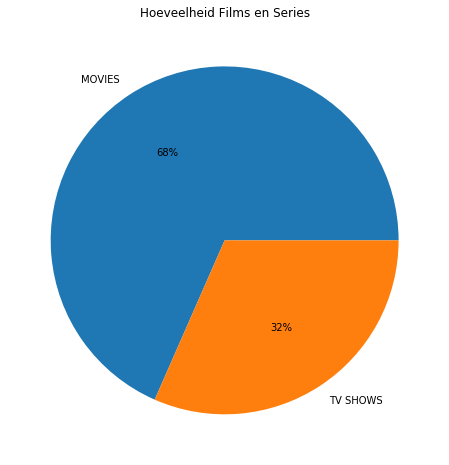

In [3]:
#Hoeveelheid films in vergelijking met series:
labels = 'MOVIES', 'TV SHOWS'
fig, plot = plt.subplots(figsize=(8,8))
plt.title('Hoeveelheid Films en Series')
plot.pie(content.type.value_counts(), autopct="%1.0f%%", labels = labels, )
plt.show()

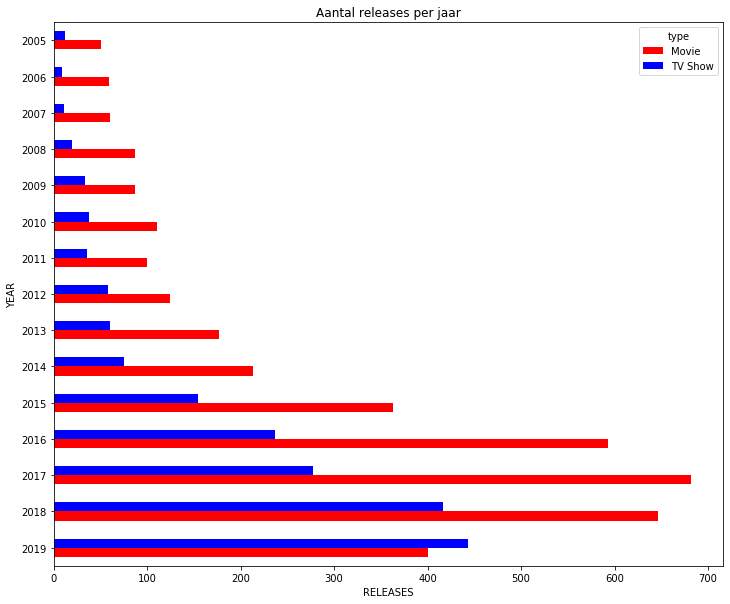

In [4]:
#Hier zien we hoeveel films per jaar er released worden
#Ook zien we dat er elk jaar meer films released worden dan de vorige jaren.
filmsPerYear = pd.crosstab(content.release_year, content.type).sort_values(by="release_year",ascending = False)[1:16] #We laten het jaar 2020 er tussen uit omdat dit jaar nog niet genoeg data heeft.
colors= ["red","blue"]
bar_plot = filmsPerYear.plot.barh(figsize=(12,10), color =colors)
bar_plot.set_title("Aantal releases per jaar")
bar_plot.set_ylabel("YEAR")
bar_plot.set_xlabel("RELEASES")
plt.show()

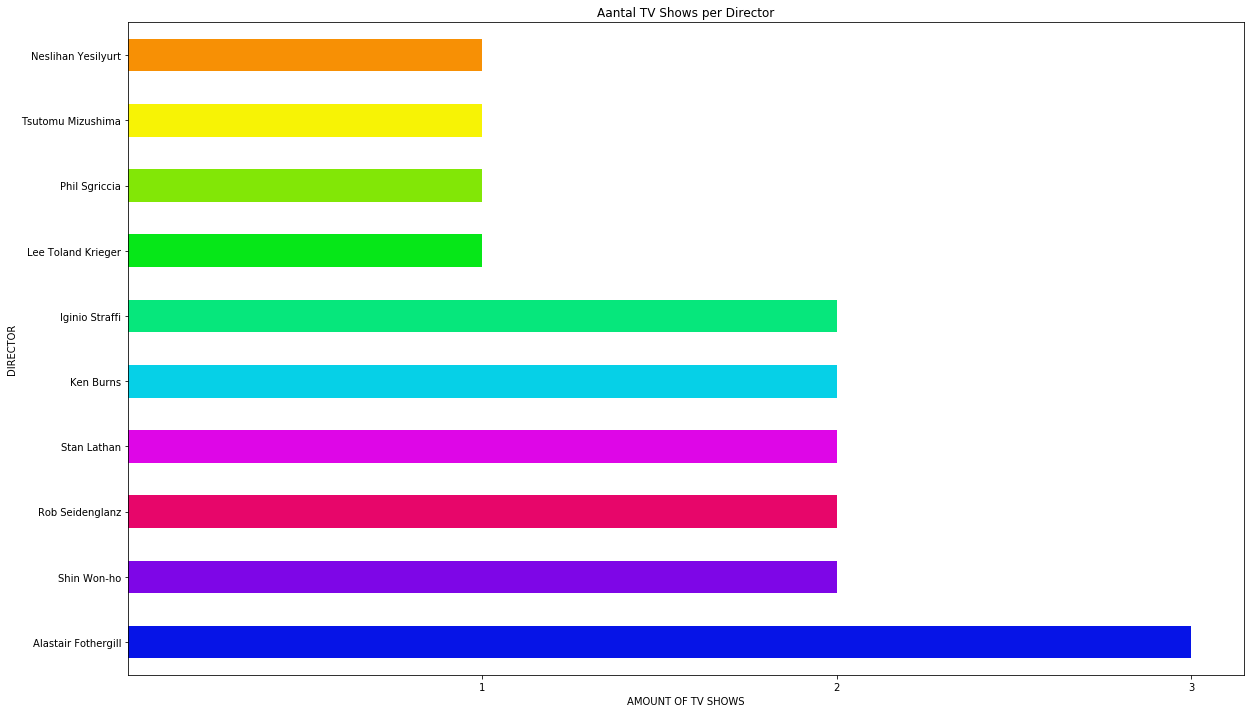

In [5]:
#De director en het aantal gemaakte TV Shows
TV_Shows = content[content.type == "TV Show"]
bar_data = TV_Shows['director'].value_counts()[0:10]
bar_plot = bar_data.plot.barh(figsize=(20, 12), color = ["#0614e7","#7e06e7",
                                                      "#e7066a","#de06e7",
                                                      "#06d0e7","#06e77c",
                                                      "#06e718","#82e706",
                                                      "#f7f305","#f79005"])
plt.xticks([1,2,3])
bar_plot.set_title("Aantal TV Shows per Director")
bar_plot.set_xlabel("AMOUNT OF TV SHOWS")
bar_plot.set_ylabel("DIRECTOR")
plt.show()

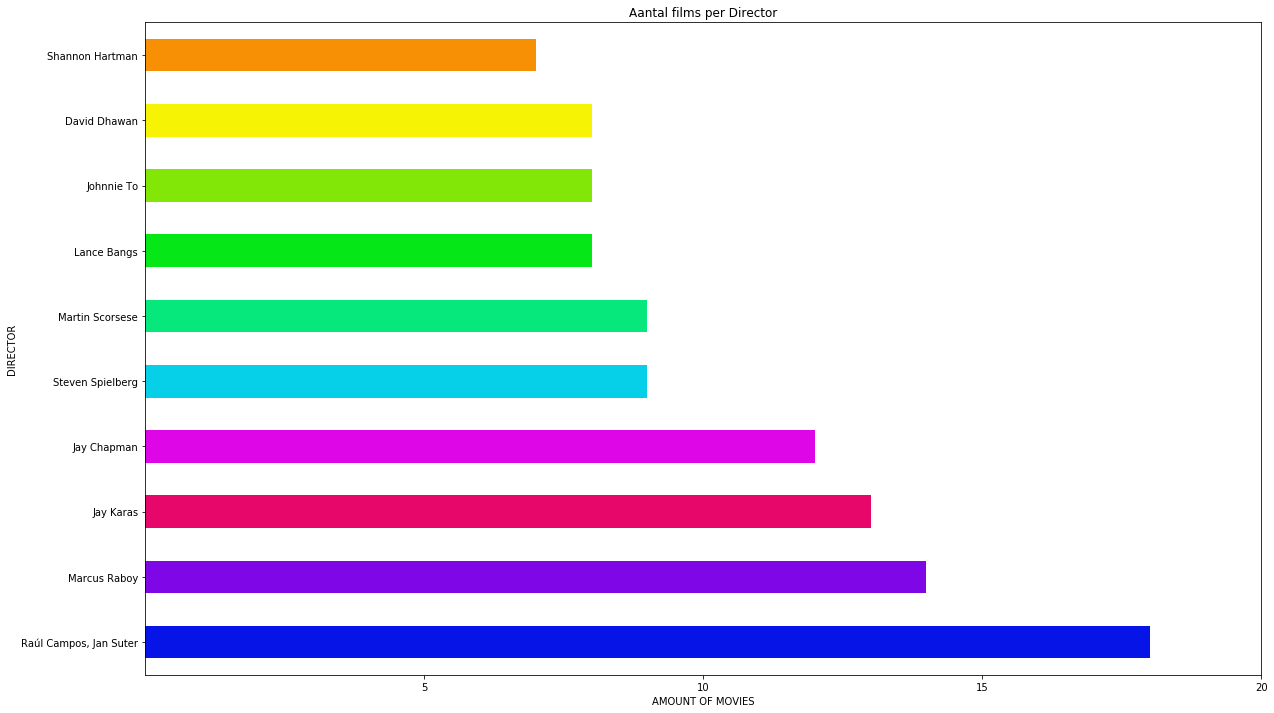

In [6]:
#De director en het aantal gemaakte Films
Movie = content[content.type == "Movie"]
bar_data = Movie['director'].value_counts()[0:10]
bar_plot = bar_data.plot.barh(figsize=(20, 12), color = ["#0614e7","#7e06e7",
                                                      "#e7066a","#de06e7",
                                                      "#06d0e7","#06e77c",
                                                      "#06e718","#82e706",
                                                      "#f7f305","#f79005"])
plt.xticks([5,10,15,20])
bar_plot.set_title("Aantal films per Director")
bar_plot.set_xlabel("AMOUNT OF MOVIES")
bar_plot.set_ylabel("DIRECTOR")
plt.show()

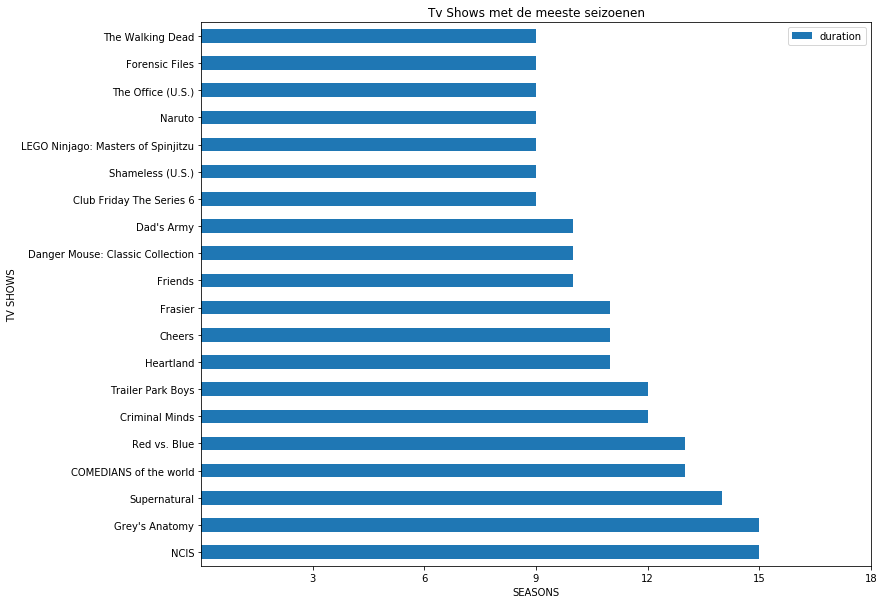

In [10]:
colors = ["#0614e7","#7e06e7","#e7066a","#de06e7","#06d0e7",
         "#06e77c","#06e718","#82e706","#f7f305","#f79005",
         "#f74d05","#f72005","#000000","#6aa5c6","#1e5164",
         "#9983d9", "#456121", "#FF1234", "1234FF", "#23FF99"]

#Create dataset with only Tv Shows
tvshows = content[content.type=="TV Show"]

#replace the duration with an integer for the number of seasons to sort correctly
#and rename the duration column
seasons = list(map(lambda x:int(x.rsplit(" ")[0]), tvshows.duration))
tvshows.duration = seasons

#Top 20 longest running Tv Shows
longestShows= tvshows[["duration","title"]].sort_values(by="duration", ascending=False)[0:20]

bar_plot = longestShows.plot.barh(figsize=(12,10))
bar_plot.set_title("Tv Shows met de meeste seizoenen")
bar_plot.set_xlabel("SEASONS")
bar_plot.set_ylabel("TV SHOWS")
plt.xticks([3,6,9,12,15,18])
plt.yticks(ticks=range(0,20), labels=longestShows.title.values)
plt.show()

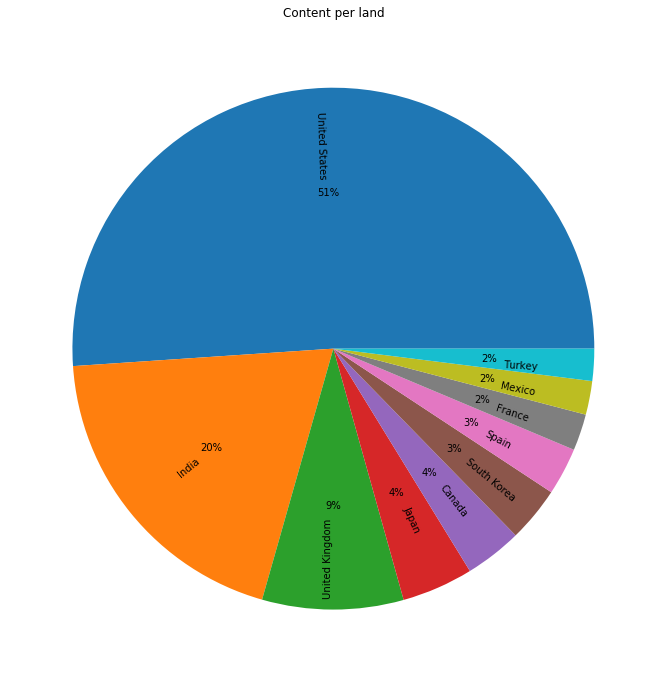

In [8]:
#Landen met de meeste content gemaakt in hun land
top_countries = content.country.value_counts()[0:10]
pie_data = top_countries
pie_plot = pie_data.plot.pie(figsize=(12,12), autopct="%1.0f%%", rotatelabels = 1, labeldistance=0.65)
pie_plot.set_title("Content per land")
pie_plot.set_ylabel("")
plt.show()

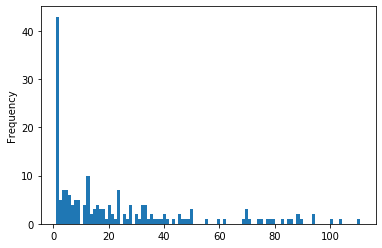

In [9]:
#De duratie van de films
Movie = content[content.type == "Movie"]
hist_data = Movie['duration'].value_counts()
hist_plot = hist_data.plot.hist(bins = 100)